In [108]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [109]:
#Reading in Hotel Data and Showing the info of data
hotelData = pd.read_csv("hotel_bookings.csv")
hotelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [110]:
#Cleaning the data to remove abnormality were abies or children are in hotel room without any adults or the total family size is 0
hotelData = ps.sqldf("Select * from hotelData where adults != 0")

In [111]:
#Gathering a subset of the adults, children, babies to then add a column for total family size
hotelSubset = hotelData[["adults", "children", "babies"]]
hotelSubset

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
118982,2,0.0,0
118983,3,0.0,0
118984,2,0.0,0
118985,2,0.0,0


In [112]:
#Adding column for total family size to the hotel subset
list = []
for index, item in hotelSubset.iterrows():
    print(item["adults"] + item["children"])
    list.append(item["adults"] + item["children"] + item["babies"])
hotelSubset["family_size"] = np.array(list)

2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
3.0
3.0
2.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
1.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
2.0
2.0
2.0
3.0
2.0
2.0
4.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
3.0
4.0
2.0
1.0
1.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
1.0
2.0
2.0
3.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
3.0
2.0
1.0
2.0
4.0
2.0
2.0
3.0
4.0
2.0
3.0
2.0
1.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
1.0
3.0
1.0
5.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
3.0
2.0
4.0
3.0
4.0
2.0
4.0
4.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


/var/folders/wj/jzq0_8j16fq7c1krlsj8nql80000gn/T/ipykernel_1513/3499837343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotelSubset["family_size"] = np.array(list)


In [113]:
#Validating family_size
hotelSubset

,adults,children,babies,family_size
0,2,0.0,0,2.0
1,2,0.0,0,2.0
2,1,0.0,0,1.0
3,1,0.0,0,1.0
4,2,0.0,0,2.0
...,...,...,...,...
118982,2,0.0,0,2.0
118983,3,0.0,0,3.0
118984,2,0.0,0,2.0
118985,2,0.0,0,2.0


In [114]:
#moving family_size over to main dataframe
hotelData["family_size"] = hotelSubset["family_size"]

In [115]:
#Verifying Hotel Data
hotelData

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_size
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118982,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
118983,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
118984,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
118985,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [116]:
#Get Number of cancellations per family size
#1 indicates cancellation
num_cancel = {0:0} #Dictionary of number of cancellations
num_stay = {0:0}
for index, row in hotelData.iterrows():

    if (num_cancel.get(row["family_size"]) == None or num_stay.get(row["family_size"]) == None):

        if row["is_canceled"] == 1:
            num_cancel[row["family_size"]] = 1

        elif row["is_canceled"] == 0:
            num_stay[row["family_size"]] = 1

    elif not (np.isnan(num_cancel.get(row["family_size"])) or np.isnan(num_stay.get(row["family_size"]))):
        if row["is_canceled"] == 1:
            num_cancel[row["family_size"]] = num_cancel.get(row["family_size"]) + 1
        elif row["is_canceled"] == 0:
            num_stay[row["family_size"]] = num_stay.get(row["family_size"]) + 1


In [117]:
#Verifying num cancel with known values
num_cancel #Key is the size of the family, Value is the number of cancellations per family size. 

{0: 0,
 2.0: 32489,
 3.0: 3372,
 4.0: 1646,
 1.0: 6555,
 12.0: 1,
 40.0: 1,
 26.0: 1,
 50.0: 1,
 27.0: 1,
 55.0: 1,
 20.0: 1,
 6.0: 1,
 5.0: 34,
 10.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1}

In [118]:
#Verifying num_stay to see how many number of stays per family size. 
num_stay

{0: 0,
 2.0: 49349,
 1.0: 16018,
 3.0: 7108,
 4.0: 2283,
 5.0: 103,
 12.0: 1,
 10.0: 1}

In [119]:
#verifying that both the num_stay and num_cancel equal the total rows
sum = 0
for key in num_cancel:
    sum = num_cancel.get(key) + sum

for key in num_stay:
    sum = num_stay.get(key) + sum

print(sum)
print(ps.sqldf("Select count(*) from hotelData where (family_size > 0 and adults > 0) and (is_canceled = 0 or is_canceled = 1)"))

118972
   count(*)
0    118983


In [120]:
#Making the X and Y values for plotting
x_cancel = []
x_stay = []
x = []
y_cancel = []
y_stay = []


for key in num_cancel:
    if not np.isnan(key):
        x_cancel.append(key)
        y_cancel.append(num_cancel.get(key))

for key in num_stay:
    if not np.isnan(key):
        x_stay.append(key)
        y_stay.append(num_stay.get(key))
    

/var/folders/wj/jzq0_8j16fq7c1krlsj8nql80000gn/T/ipykernel_1513/2807183083.py:2: RuntimeWarning: divide by zero encountered in log
  plt.bar(x_cancel, np.log(y_cancel), label = 'Cancel')


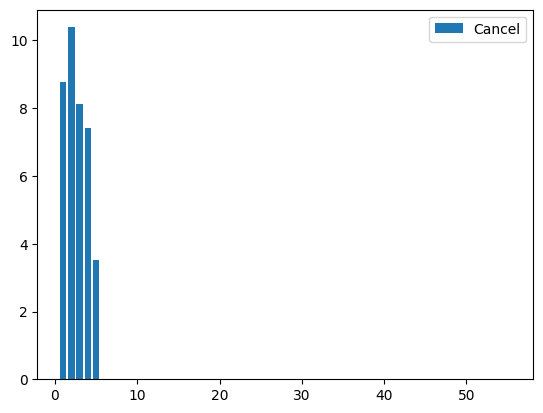

/var/folders/wj/jzq0_8j16fq7c1krlsj8nql80000gn/T/ipykernel_1513/2807183083.py:6: RuntimeWarning: divide by zero encountered in log
  plt.bar(x_stay, np.log(y_stay), label = 'Stay')


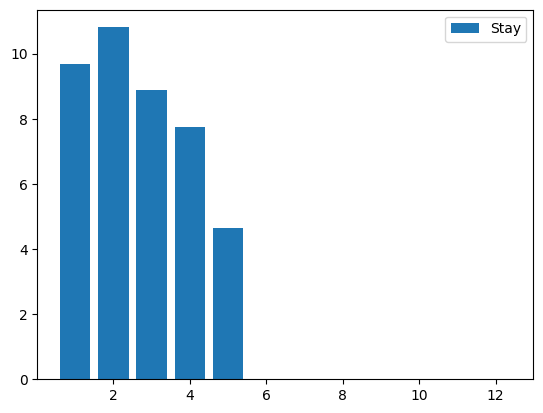

In [121]:
#Plotting the cancellations to family size
plt.bar(x_cancel, np.log(y_cancel), label = 'Cancel')
plt.legend()
plt.show()

plt.bar(x_stay, np.log(y_stay), label = 'Stay')
plt.legend()
plt.show()


## Both Small and Large families have similar chances of stays and cancellations. Calculating percentages would be more effective in the calculation given the family sizes. 

In [122]:
total = ps.sqldf("select count(*) from hotelData where is_canceled = 0 or is_canceled = 1")
total

,count(*)
0,118987


In [123]:
total = 118987

In [124]:
percent_num_cancel_dict = {}
for key in num_cancel:
    percent_num_cancel_dict[key] = (num_cancel.get(key)/total) * 100

percent_num_stay_dict = {}
for key in num_stay:
    percent_num_stay_dict[key] = (num_stay.get(key)/total) * 100

In [125]:
#Making the X and Y values for plotting
x_cancel = []
x_stay = []
y_cancel = []
y_stay = []


for key in percent_num_cancel_dict:
    x_cancel.append(key)
    y_cancel.append(percent_num_cancel_dict.get(key))

for key in percent_num_stay_dict:
    x_stay.append(key)
    y_stay.append(percent_num_stay_dict.get(key))
    

In [126]:
y_cancel

[0.0,
 27.304663534671853,
 2.8339230336087136,
 1.3833443989679544,
 5.509005185440427,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.028574550160941955,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575,
 0.0008404279459100575]

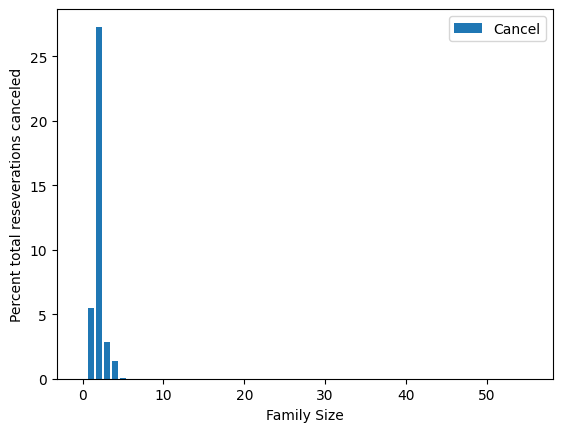

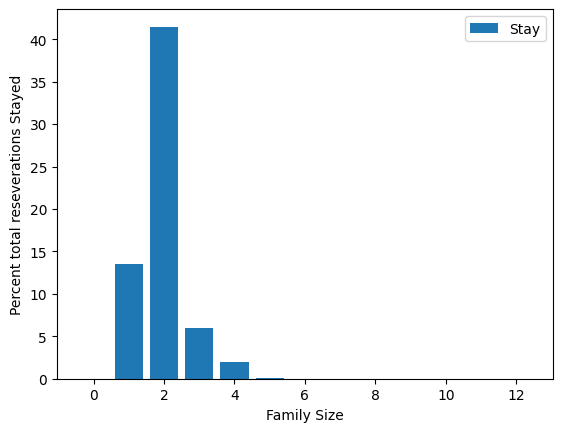

In [127]:
#Plotting the cancellations to family size
plt.bar(x_cancel, y_cancel, label = 'Cancel')
plt.xlabel("Family Size")
plt.ylabel("Percent total reseverations canceled")
plt.legend()
plt.show()

plt.bar(x_stay, y_stay, label = 'Stay')
plt.xlabel("Family Size")
plt.ylabel("Percent total reseverations Stayed")
plt.legend()
plt.show()


## From the above two graphs, we can make the conclusion that overall, families go through with their reservations and not cancel. We can also see that the likelihood of the family staying goes up with smaller reservations, however it is important to note that these family sizes also make up the majority of the total populations. 

# **Apply a logistic regression model if we can determine whether a family will stay or cancel their reservation**

In [128]:
hotelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118987 entries, 0 to 118986
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118987 non-null  object 
 1   is_canceled                     118987 non-null  int64  
 2   lead_time                       118987 non-null  int64  
 3   arrival_date_year               118987 non-null  int64  
 4   arrival_date_month              118987 non-null  object 
 5   arrival_date_week_number        118987 non-null  int64  
 6   arrival_date_day_of_month       118987 non-null  int64  
 7   stays_in_weekend_nights         118987 non-null  int64  
 8   stays_in_week_nights            118987 non-null  int64  
 9   adults                          118987 non-null  int64  
 10  children                        118983 non-null  float64
 11  babies                          118987 non-null  int64  
 12  meal            

In [129]:
#Getting Dummy data for Hotel to allow for logistic regression
dummies_hotel = pd.get_dummies(hotelData["hotel"])
dummies_arrivalDateMonth = pd.get_dummies(hotelData["arrival_date_month"])
dummies_customerType = pd.get_dummies(hotelData["customer_type"])
dummies_reservationStatus = pd.get_dummies(hotelData["reservation_status"])
dummies_meal = pd.get_dummies(hotelData["meal"])
dummies_country = pd.get_dummies(hotelData["country"])
dummies_marketSement = pd.get_dummies(hotelData["market_segment"])
dummies_distributionChannel = pd.get_dummies(hotelData["distribution_channel"])
dummies_reservedRoomType = pd.get_dummies(hotelData["reserved_room_type"])
dummies_reservationStatusDate = pd.get_dummies(hotelData["reservation_status_date"])
dummies_assignedRoomType = pd.get_dummies(hotelData["assigned_room_type"])
dummies_depositType = pd.get_dummies(hotelData["deposit_type"])


In [130]:
hotelData_copy = hotelData #Keeping backup of hotel data
hotelData = pd.concat([hotelData, dummies_hotel, dummies_arrivalDateMonth, dummies_customerType, dummies_reservationStatus, dummies_meal, dummies_country, dummies_marketSement, 
                       dummies_distributionChannel, dummies_reservedRoomType, dummies_reservationStatusDate, dummies_assignedRoomType, dummies_depositType], axis='columns')


In [100]:
hotelData.drop(columns = ["hotel"])

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_size,City Hotel,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,False,True
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,False,True
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,False,True
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,False,True
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118982,0,23,2017,August,35,30,2,5,2,0.0,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,True,False
118983,0,102,2017,August,35,31,2,5,3,0.0,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,True,False
118984,0,34,2017,August,35,31,2,5,2,0.0,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,True,False
118985,0,109,2017,August,35,31,2,5,2,0.0,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,True,False


In [131]:
#Seperating is_canceled from hotel data to prep for train test split

hotelData_y = hotelData["is_canceled"]
hotelData_x = hotelData.drop(columns = ["is_canceled", "hotel", "arrival_date_month", "customer_type", "reservation_status", "meal", "country", "market_segment", "distribution_channel", 
                                        "reserved_room_type", "reservation_status_date", "assigned_room_type", "deposit_type"])

In [132]:
hotelData_x

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,E,F,G,H,I,K,L,No Deposit,Non Refund,Refundable
0,342,2015,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,737,2015,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,7,2015,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,13,2015,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,14,2015,27,1,0,2,2,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118982,23,2017,35,30,2,5,2,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
118983,102,2017,35,31,2,5,3,0.0,0,0,...,True,False,False,False,False,False,False,True,False,False
118984,34,2017,35,31,2,5,2,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
118985,109,2017,35,31,2,5,2,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False


In [133]:
hotelData_y

0         0
1         0
2         0
3         0
4         0
         ..
118982    0
118983    0
118984    0
118985    0
118986    0
Name: is_canceled, Length: 118987, dtype: int64

In [134]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    hotelData_x, hotelData_y, test_size=0.33, random_state=42)

In [135]:
#Fitting logreg model
logreg_model = LogisticRegression(random_state = 0).fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values